Step 1: Import Required Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Load Dataset and Select Relevant Columns

In [18]:
# Step 2: Load Dataset
# Replace 'sms_data.csv' with the actual path to your dataset
data = pd.read_csv('/content/spam.csv', encoding_errors='ignore')

data = data[['v1', 'v2']]
data.columns = ['label', 'message']  # Rename columns for clarity
print(data.head())
print(data.info())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


Step 3: Preprocess the Data

In [19]:
# Map labels to binary values
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Check the distribution of the labels
print(data['label'].value_counts())


label
0    4825
1     747
Name: count, dtype: int64


Step 4: Convert Text to Features Using TF-IDF

In [20]:
# Transform messages using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['message'])  # TF-IDF features
y = data['label']  # Labels for classification


Step 5: Split the Dataset

In [21]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


step 6: Naive Bayes Model Training and Evaluation

Accuracy of Naive Bayes: 0.96


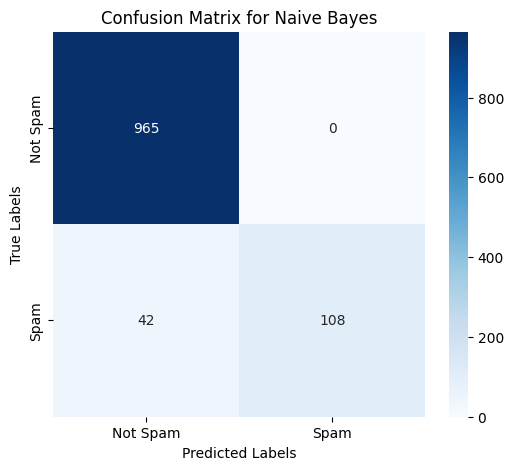

In [38]:
# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f'Accuracy of {model_name}: {accuracy:.2f}')

    # Plotting confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Spam', 'Spam'],
                yticklabels=['Not Spam', 'Spam'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
evaluate_model(y_test, y_pred_nb, 'Naive Bayes')



step 7: Support Vector Machine Training and Evaluation

Accuracy of Support Vector Machine: 0.98


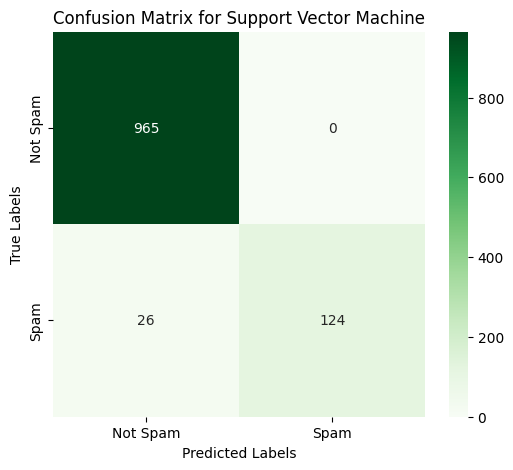

In [34]:
# Train a Support Vector Machine model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Function to evaluate and plot confusion matrix
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f'Accuracy of {model_name}: {accuracy:.2f}')

    # Plotting confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=['Not Spam', 'Spam'],
                yticklabels=['Not Spam', 'Spam'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()




evaluate_model(y_test, y_pred_svm, 'Support Vector Machine')


step 8: Logistic Regression model Training and evaluation

Accuracy of Logistic Regression: 0.96


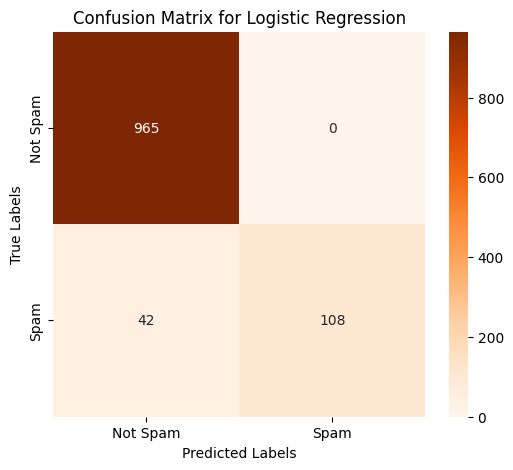

In [35]:
# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f'Accuracy of {model_name}: {accuracy:.2f}')

    # Plotting confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=['Not Spam', 'Spam'],
                yticklabels=['Not Spam', 'Spam'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

evaluate_model(y_test, y_pred_lr, 'Logistic Regression')

